# **K-Means**

K-means clustering is a clustering method that subdivides a single cluster or a collection of data points into K different clusters or groups. 

The algorithm analyzes the data to find organically similar data points and assigns each point to a cluster that consists of points with similar characteristics. Each cluster can then be used to label the data into different classes based on the characteristics of the data.K-Means clustering works by constantly trying to find a centroid with closely held data points. This means that each cluster will have a centroid and the data points in each cluster will be closer to its centroid compared to the other centroids.

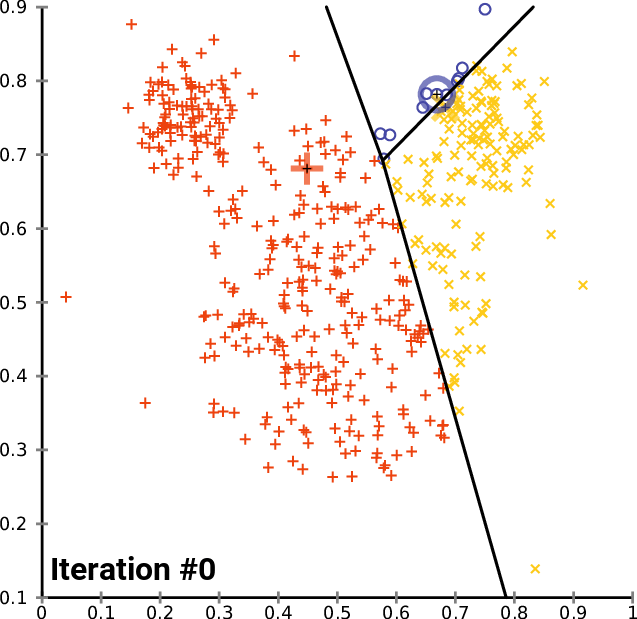

K-Means Algorithm

1. Selecting an appropriate value for K which is the number of clusters or centroids
2. Selecting random centroids for each cluster
3.  Assigning each data point to its closest centroid
4.    Adjusting the centroid for the newly formed cluster in step 4
5.    Repeating step 4 and 5 till all the data points are perfectly organised within a cluster space

## **Choosing The Right Number Of Clusters**

The number of clusters that we choose for a given dataset cannot be random. Each cluster is formed by calculating and comparing the distances of data points within a cluster to its centroid. An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). 



WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids

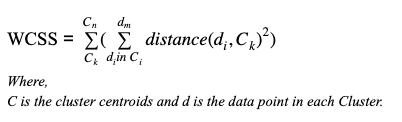

The idea is to minimise the sum. Suppose there are n observation in a given dataset and we specify n number of clusters (k = n) then WCSS will become zero since data points themselves will act as centroids and the distance will be zero and ideally this forms a perfect cluster, however this doesn’t make any sense as we have as many clusters as the observations. Thus there exists a threshold value for K which we can find using the Elbow point graph.

## **Elbow method**

We can find the optimum value for K using an Elbow point graph. We randomly initialise the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value.


The resulting graph would look something like what’s shown below:

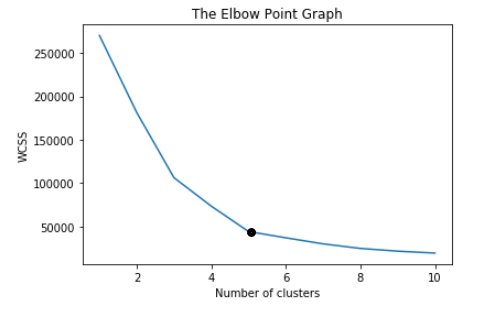

For the above-given graph, the optimum value for K would be 5. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS. For example, from cluster 1 to 2 to 3 in the above graph we see a sudden and huge drop in WCSS. After 5 the drop is minimal and hence we chose 5 to be the optimal value for K.

## **The Random Initialisation Trap**

One major drawback of K-Means clustering is the random initialisation of centroids. The formation of clusters is closely bound by the initial position of a centroid. The random positioning of the centroids can completely alter clusters and can result in a random formation.

The solution is K-means++. K-Means++ is an algorithm that is used to initialise the K-Means algorithm.

## **K Means++**

The algorithm is as follows:

1. Choose one centroid uniformly at random from among the data points.
2. For each data point say x, compute D(x), which is the distance between x and the nearest centroid that has already been chosen.
3. Choose one new data point at random as a new centroid, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2.
4. Repeat Steps 2 and 3 until K centres have been chosen.
5. Proceed with standard k-means clustering.

## **Hands-On K-Means Clustering**

### **Importing Necessary Libraries**

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy sklearn statsmodels scikit-image --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#For Jupyter Notebooks to show the plots
%matplotlib inline

### **Importing The Iris Dataset**

In [ ]:
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

### **Selecting The Features For Clustering**

Since we are clustering the data, we don’t need the labels or classes of Iris species. We will drop this column and will use clustering to group the data points into 3 clusters based on sepal length and petal length of the flower.

In [ ]:
#Dropping the 'Species' column
iris_clustering = df.drop(columns = ['target'])
#Selecting 2 random features from the dataset for clustering
#Here we choose Sepal Length @ column 0 and Petal Length @ column 2
X = iris_clustering.iloc[:, [0,2]].values

Note: We only chose 2 features as we are going to plot in 2D space. The algorithm will work finr for any number of features.

### **Using Elbow Graph To Find Optimum Number Of Clusters**

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
   kmeans.fit(X)
   #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
   wcss.append(kmeans.inertia_)  

In [ ]:
#Plotting The Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


We can see that after 3 the drop in WCSS is minimal. So we choose 3 as the optimal number of clusters

### **Initialising K-Means With Optimum Number Of Clusters**

In [ ]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)

### **Visualising The Clusters**

In [ ]:
# Visualising the clusters
#Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red and points in size s = 50
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
#Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue and points in size s = 50
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
#Scatter plotting for (x,y) with label 3 as Cluster 3 in color c = green and points in size s = 50
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

#Scatter plotting the centroids with label = 'Centroids' in color c = cyan and points in size s = 100
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'cyan', label = 'Centroids')

plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()

#**Related Articles-**

> * [Clustering Algorithm every Data Science Practitioner should know](https://analyticsindiamag.com/clustering-techniques-every-data-science-beginner-should-swear-by/)

> * [Beginner Guide to K-Means](https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/)

> * [Is K-Means is the best algorithm?](https://analyticsindiamag.com/is-k-means-clustering-really-the-best-unsupervised-learning-algorithm/)